In [28]:
import os, sys

base_path = os.path.join(os.getcwd(), "..")
print(f"Base Path: {base_path}")
sys.path.append(base_path)

# Plot reward
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import numpy as np

# Load gym environment
import gym
from kube_sim_gym import *
from kube_sim_gym.envs.sim_kube_env import SimKubeEnv

from kube_hr_scheduler.scheduler.sim_hr_scheduler import SimHrScheduler
from kube_hr_scheduler.strategies.model.default import Model

from kube_rl_scheduler.scheduler.sim_rl_scheduler import SimRlScheduler

Base Path: /Users/swkim/Documents/coding/thesis/PROMES_colab/notebook/..


# Compare Final more with baselines

In [29]:
env = gym.make('SimKubeEnv-v0', reward_file='eval_rbd1.py', scenario_file='scenario-5l-5m-10000p-60m_unbalanced.csv')

# Load scheduler
hr_scheduler = SimHrScheduler(env, 'random.py')
hr_scheduler_ = SimHrScheduler(env, 'default.py', True)
rl_scheduler = SimRlScheduler(env, 'DQN_sbs_step1to4_1M_1.zip')

Model type: DQN


In [30]:
def run(env, scheduler):
    
    state = env.reset()
    done = False
    rew = []

    while not done:
        action = scheduler.decision(env)
        state, reward, done, info = env.step(action)

        n_scheduled = len(env.cluster.running_pods) + len(env.cluster.terminated_pods)
        if env.time % 1000 == 0:
            print(f"Num of scheduled: {n_scheduled}, Time: {env.time}, Reward: {reward}")
            rew.append(reward)



    x = np.arange(0, len(rew), 1) * 1000
    y = rew

    f = interp1d(x, y, kind='cubic')

    # Plotting the Graph
    X_=np.linspace(x.min(), x.max(), 50)
    Y_=f(X_)

    plt.plot(X_, Y_)

    return rew

Num of scheduled: 516, Time: 1000, Reward: 0.9
Num of scheduled: 1001, Time: 2000, Reward: 0.9
Num of scheduled: 1488, Time: 3000, Reward: 0.79
Num of scheduled: 1970, Time: 4000, Reward: 0.91
Num of scheduled: 2456, Time: 5000, Reward: 0.95
Num of scheduled: 2906, Time: 6000, Reward: 0.9299999999999999
Num of scheduled: 3349, Time: 7000, Reward: 0.8
Num of scheduled: 3782, Time: 8000, Reward: 0.86
Num of scheduled: 4247, Time: 9000, Reward: 0.89
Num of scheduled: 4705, Time: 10000, Reward: 0.91
Num of scheduled: 5149, Time: 11000, Reward: 0.8
Num of scheduled: 5630, Time: 12000, Reward: 0.85
Num of scheduled: 6048, Time: 13000, Reward: 0.8
Num of scheduled: 6515, Time: 14000, Reward: 0.91
Num of scheduled: 6969, Time: 15000, Reward: 0.9299999999999999
Num of scheduled: 7415, Time: 16000, Reward: 0.83
Num of scheduled: 7897, Time: 17000, Reward: 0.85
Num of scheduled: 8355, Time: 18000, Reward: 0.92
Num of scheduled: 8831, Time: 19000, Reward: 0.94
Num of scheduled: 9291, Time: 20000, 

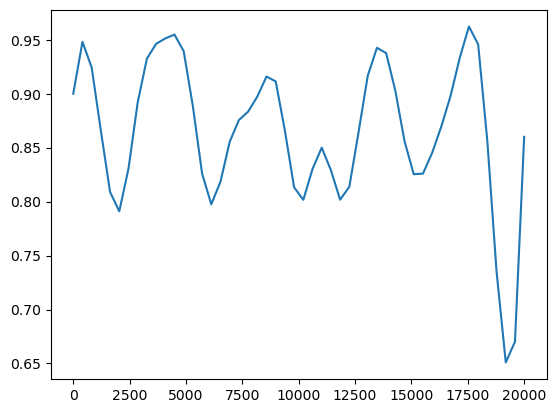

In [31]:
# HR scheduler
rew1 = run(env, hr_scheduler)

Num of scheduled: 550, Time: 1000, Reward: 0.83
Num of scheduled: 1085, Time: 2000, Reward: 0.87
Num of scheduled: 1596, Time: 3000, Reward: 0.9299999999999999
Num of scheduled: 2113, Time: 4000, Reward: 0.84
Num of scheduled: 2625, Time: 5000, Reward: 0.9299999999999999
Num of scheduled: 3078, Time: 6000, Reward: 0.81
Num of scheduled: 3537, Time: 7000, Reward: 0.72
Num of scheduled: 4005, Time: 8000, Reward: 0.78
Num of scheduled: 4500, Time: 9000, Reward: 0.79
Num of scheduled: 5005, Time: 10000, Reward: 0.91
Num of scheduled: 5500, Time: 11000, Reward: 0.89
Num of scheduled: 5959, Time: 12000, Reward: 0.86
Num of scheduled: 6444, Time: 13000, Reward: 0.88
Num of scheduled: 6940, Time: 14000, Reward: 0.95
Num of scheduled: 7413, Time: 15000, Reward: 0.87
Num of scheduled: 7921, Time: 16000, Reward: 0.97
Num of scheduled: 8414, Time: 17000, Reward: 0.81
Num of scheduled: 8930, Time: 18000, Reward: 0.8200000000000001
Num of scheduled: 9414, Time: 19000, Reward: 0.89
Num of scheduled: 

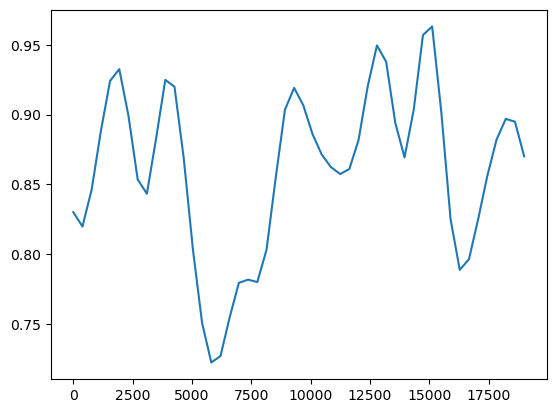

In [32]:
# Dumb HR scheduler
rew2 = run(env, hr_scheduler_)

Num of scheduled: 546, Time: 1000, Reward: 0.88
Num of scheduled: 1085, Time: 2000, Reward: 0.87
Num of scheduled: 1595, Time: 3000, Reward: 0.94
Num of scheduled: 2110, Time: 4000, Reward: 0.9299999999999999
Num of scheduled: 2621, Time: 5000, Reward: 0.9299999999999999
Num of scheduled: 3074, Time: 6000, Reward: 0.85
Num of scheduled: 3537, Time: 7000, Reward: 0.75
Num of scheduled: 4004, Time: 8000, Reward: 0.79
Num of scheduled: 4499, Time: 9000, Reward: 0.84
Num of scheduled: 4998, Time: 10000, Reward: 0.96
Num of scheduled: 5491, Time: 11000, Reward: 0.91
Num of scheduled: 5948, Time: 12000, Reward: 0.86
Num of scheduled: 6431, Time: 13000, Reward: 0.91
Num of scheduled: 6919, Time: 14000, Reward: 0.91
Num of scheduled: 7398, Time: 15000, Reward: 0.9
Num of scheduled: 7910, Time: 16000, Reward: 0.96
Num of scheduled: 8386, Time: 17000, Reward: 0.92
Num of scheduled: 8915, Time: 18000, Reward: 0.95
Num of scheduled: 9388, Time: 19000, Reward: 0.94
Num of scheduled: 9908, Time: 200

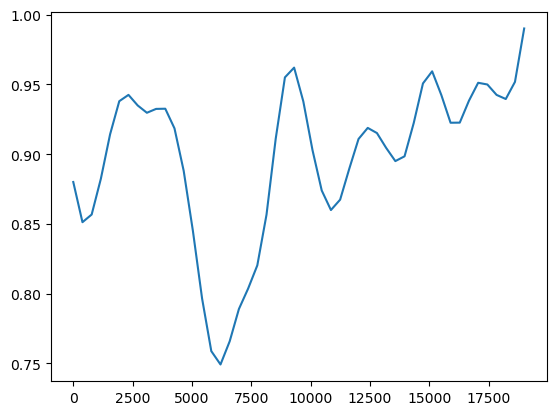

In [33]:
# RL scheduler
rew3 = run(env, rl_scheduler)

In [34]:
len(rew1), len(rew2), len(rew3)

(21, 20, 20)

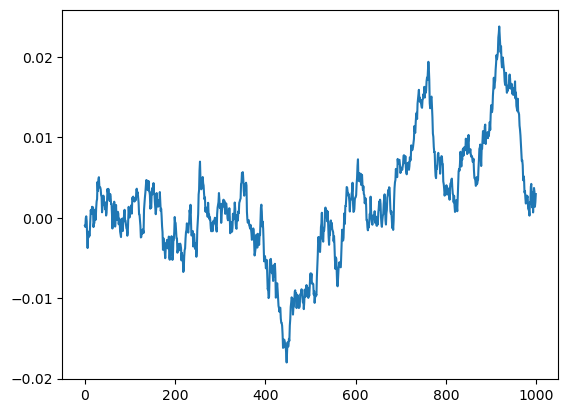

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
data = np.random.randn(1000)

# Calculate the CDF
cdf = np.cumsum(data) / len(data)

# Plot the CDF
plt.plot(cdf)
plt.show()

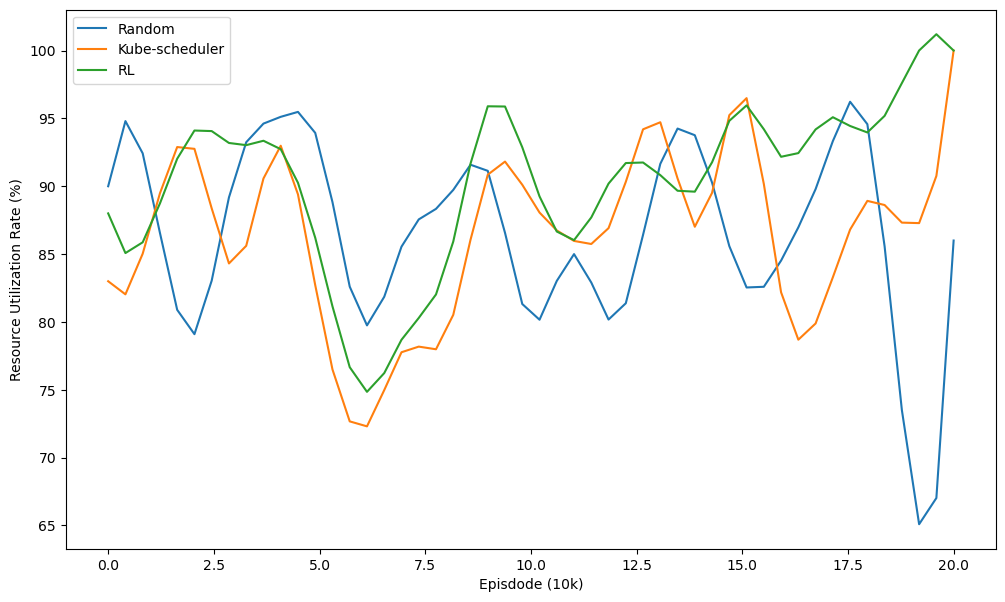

In [36]:
# Draw rew1, rew2, rew3 together
# y1 = [e * 100 for e in rew1]
# y2 = [e * 100 for e in rew2]
# y3 = [e * 100 for e in rew3]
y1 = np.array(rew1) * 100
y2 = np.array(rew2) * 100
y3 = np.array(rew3) * 100

max_len = max(len(y1), len(y2), len(y3))
x = np.arange(0, max_len, 1)# * 1000

# If the number of data points is not equal, append 0 to the shorter one
if len(y1) < max_len:
    y1 = np.append(y1, np.ones(max_len - len(y1)) * 100)
if len(y2) < max_len:
    y2 = np.append(y2, np.ones(max_len - len(y2)) * 100)
if len(y3) < max_len:
    y3 = np.append(y3, np.ones(max_len - len(y3)) * 100)

# cdf_y1 = np.cumsum(y1) / len(y1)
# cdf_y2 = np.cumsum(y2) / len(y2)
# cdf_y3 = np.cumsum(y3) / len(y3)

# print(len(x), len(y1))
f1 = interp1d(x, y1, kind='cubic')
f2 = interp1d(x, y2, kind='cubic')
f3 = interp1d(x, y3, kind='cubic')

# Plotting the Graph
X_=np.linspace(x.min(), x.max(), 50)
Y1_=f1(X_)
Y2_=f2(X_)
Y3_=f3(X_)

plt.figure(figsize=(12,7))

# Draw CDF graph
# plt.hist(Y1_, bins=100, density=True, histtype='step', cumulative=True, label='HR')
# plt.hist(Y2_, bins=100, density=True, histtype='step', cumulative=True, label='Dumb HR')
# plt.hist(Y3_, bins=100, density=True, histtype='step', cumulative=True, label='RL')

# Plot
plt.plot(X_, Y1_, label='Random')
plt.plot(X_, Y2_, label='Kube-scheduler')
plt.plot(X_, Y3_, label='RL')

# plt.hist(y1, density=True, cumulative=True, label='CDF',
#          histtype='step', alpha=0.8, color='k')


# Fill the area between the lines
# plt.fill_between(X_, Y1_, Y2_, color='blue', alpha=.1)
# plt.fill_between(X_, Y2_, Y3_, color='orange', alpha=.1)
# plt.fill_between(X_, Y3_, Y1_, color='green', alpha=.1)

plt.xlabel('Episdode (10k)')
plt.ylabel('Resource Utilization Rate (%)')

# y axis range 0 to 100
plt.legend()
plt.show()

In [37]:
# Random float 61 numbers into a list
import random
randomlist = []
for i in range(0,61):
    n = random.uniform(0.0,100.0)
    randomlist.append(n)

In [40]:
# In one line same function
randomlist = [random.uniform(0.0,100.0) for i in range(0,61)]
randomlist

[82.12228881861601,
 82.43104488630655,
 50.8604668512732,
 31.00287478583077,
 67.00514156501492,
 62.70353074225985,
 2.620886539098699,
 50.85918386551847,
 23.374167129369916,
 69.02589718268922,
 60.48575025822336,
 46.725157339468204,
 64.27926419691326,
 20.27035646027474,
 43.57664185222425,
 97.52170829644479,
 50.65361820309706,
 47.606152487215645,
 35.389329573809626,
 65.58772893904627,
 1.6647269961083233,
 37.1425868177995,
 29.18447966371084,
 79.34867381246214,
 93.44097989736653,
 55.98096676112567,
 29.314900346417083,
 73.61401486622637,
 75.03408874677608,
 62.914382830982994,
 43.48483361417868,
 57.99758463089052,
 74.31572786695264,
 57.89301254461874,
 48.9078852549051,
 69.49954200443106,
 82.12116174206274,
 52.67383680467434,
 13.46758407775549,
 95.36831492033309,
 77.86066294424778,
 49.69185307916454,
 98.59409754143508,
 91.68273726078657,
 28.93295746863491,
 54.57657813183631,
 20.36970387134238,
 39.85101286064613,
 1.3264368461810894,
 4.661677869508

In [ ]:
a = [1,2,3]
b = [4,5,6]

# plus the elements in numpy
np.array(a) + np.array(b)